#  Data Structures- Space and Time Complexity
> Observing the time complexity of different algorithms
- week: 27

# Space and Time Complexity
> Space complexity refers to the amount of memory used by an algorithm to complete its execution, as a function of the size of the input. The space complexity of an algorithm can be affected by various factors such as the size of the input data, the data structures used in the algorithm, the number and size of temporary variables, and the recursion depth. Time complexity refers to the amount of time required by an algorithm to run as the input size grows. It is usually measured in terms of the "Big O" notation, which describes the upper bound of an algorithm's time complexity.

> Why do you think a programmer should care about space and time complexity?
- Answer: A programmer should care about space and time complexity because these factors are critical in determining the performance of an algorithm. By understanding the space and time complexity of an algorithm, a programmer can choose the most appropriate algorithm for a given task and optimize its performance for different input sizes and computing resources. 

Take a look at our lassen volcano example from the data compression tech talk. The first code block is the original image. In the second code block, change the baseWidth to rescale the image. 

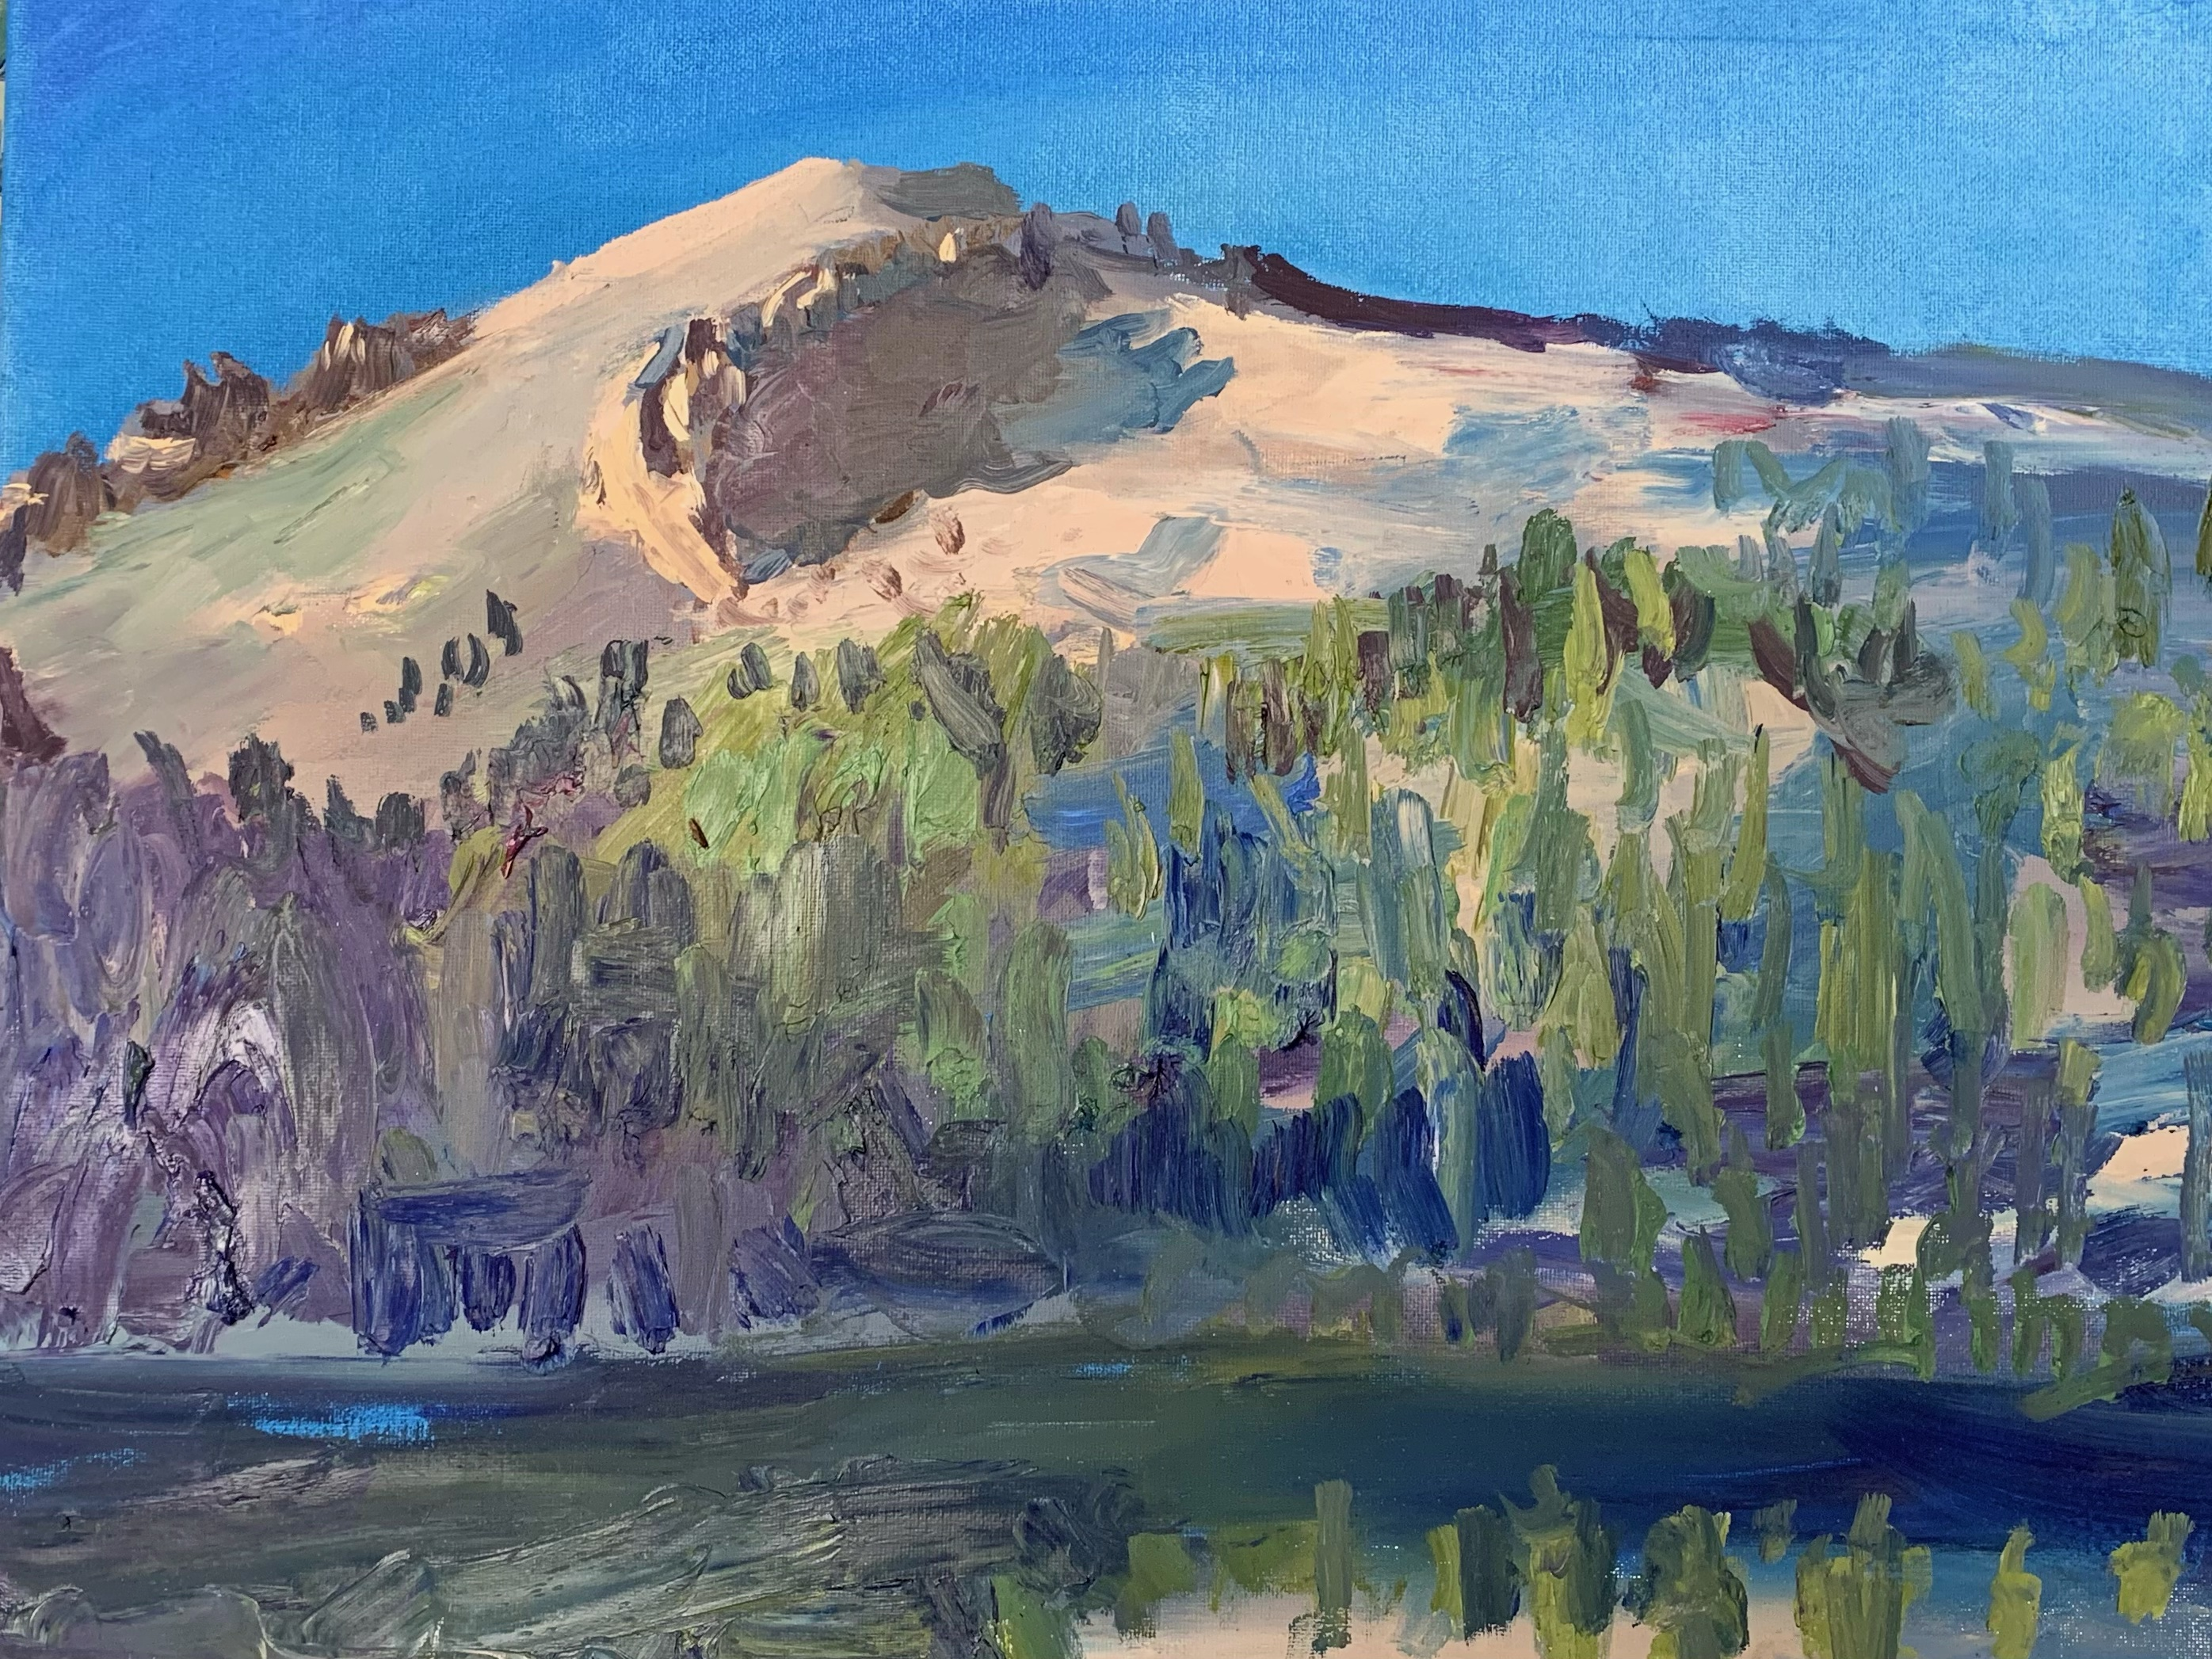

In [1]:
from IPython.display import Image, display
from pathlib import Path 

# prepares a series of images
def image_data(path=Path("images/"), images=None):  # path of static images is defaulted
    for image in images:
        # File to open
        image['filename'] = path / image['file']  # file with path
    return images

def image_display(images):
    for image in images:  
        display(Image(filename=image['filename']))

if __name__ == "__main__":
    lassen_volcano = image_data(images=[{'source': "Peter Carolin", 'label': "Lassen Volcano", 'file': "lassen-volcano.jpg"}])
    image_display(lassen_volcano)
    

---- meta data -----
Lassen Volcano
Peter Carolin
JPEG
RGB
Original size:  (2792, 2094)  pixels:  5,846,448
Scaled size:  (1250, 937)  pixels:  1,171,250
-- original image --



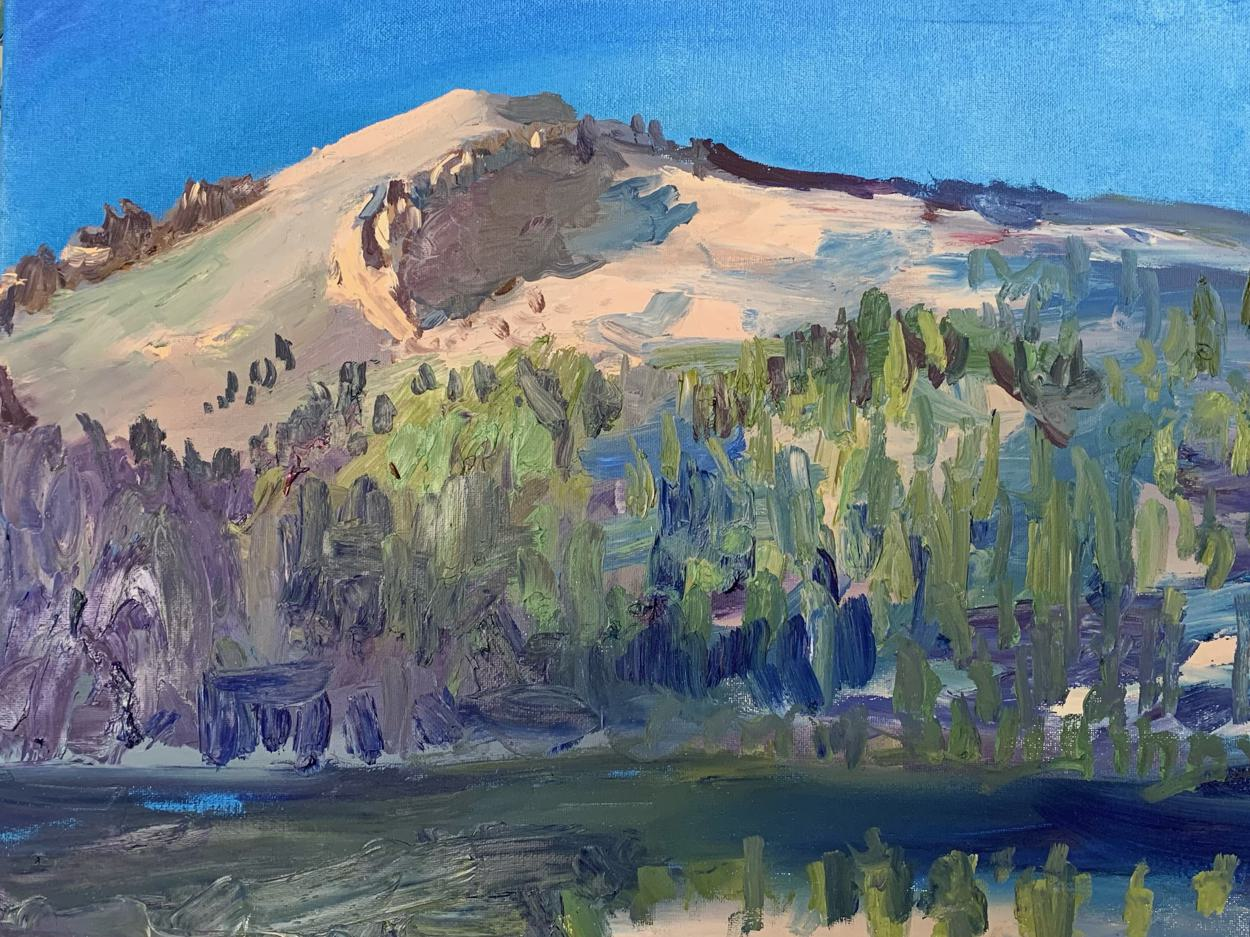

In [2]:
from IPython.display import HTML, display
from pathlib import Path 
from PIL import Image as pilImage 
from io import BytesIO
import base64

# prepares a series of images
def image_data(path=Path("images/"), images=None):  # path of static images is defaulted
    for image in images:
        # File to open
        image['filename'] = path / image['file']  # file with path
    return images

def scale_image(img):
    #baseWidth = 625
    baseWidth = 1250
    #baseWidth = 2500
    #baseWidth = 5000 # see the effect of doubling or halfing the baseWidth 
    #baseWidth = 10000 
    #baseWidth = 20000
    #baseWidth = 40000
    scalePercent = (baseWidth/float(img.size[0]))
    scaleHeight = int((float(img.size[1])*float(scalePercent)))
    scale = (baseWidth, scaleHeight)
    return img.resize(scale)

def image_to_base64(img, format):
    with BytesIO() as buffer:
        img.save(buffer, format)
        return base64.b64encode(buffer.getvalue()).decode()
    
def image_management(image):  # path of static images is defaulted        
    # Image open return PIL image object
    img = pilImage.open(image['filename'])
    
    # Python Image Library operations
    image['format'] = img.format
    image['mode'] = img.mode
    image['size'] = img.size
    image['width'], image['height'] = img.size
    image['pixels'] = image['width'] * image['height']
    # Scale the Image
    img = scale_image(img)
    image['pil'] = img
    image['scaled_size'] = img.size
    image['scaled_width'], image['scaled_height'] = img.size
    image['scaled_pixels'] = image['scaled_width'] * image['scaled_height']
    # Scaled HTML
    image['html'] = '<img src="data:image/png;base64,%s">' % image_to_base64(image['pil'], image['format'])


if __name__ == "__main__":
    # Use numpy to concatenate two arrays
    images = image_data(images = [{'source': "Peter Carolin", 'label': "Lassen Volcano", 'file': "lassen-volcano.jpg"}])
    
    # Display meta data, scaled view, and grey scale for each image
    for image in images:
        image_management(image)
        print("---- meta data -----")
        print(image['label'])
        print(image['source'])
        print(image['format'])
        print(image['mode'])
        print("Original size: ", image['size'], " pixels: ", f"{image['pixels']:,}")
        print("Scaled size: ", image['scaled_size'], " pixels: ", f"{image['scaled_pixels']:,}")
        
        print("-- original image --")
        display(HTML(image['html'])) 


> Do you think this is a time complexity or space complexity or both problem? 
- ?

## Big O Notation
- Constant O(1)
- Linear O(n)
- Quadratic O(n^2) 
- Logarithmic O(logn)
- Exponential (O(2^n))

In [4]:
#create a list called numbers with 1,000 numbers in it
numbers = list(range(1000))
print(numbers)


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

# Constant O(1)

### Time
> An example of a constant time algorithm is accessing a specific element in an array. It does not matter how large the array is, accessing an element in the array takes the same amount of time. Therefore, the time complexity of this operation is constant, denoted by O(1).

In [5]:
#prints the number at index 263
print(numbers[263])

ncaa_bb_ranks = {1:"Alabama",2:"Houston", 3:"Purdue", 4:"Kansas"}
#look up a value in a dictionary given a key
print(ncaa_bb_ranks[1]) 

263
Alabama


### Space
> This function takes two number inputs and returns their sum. The function does not create any additional data structures or variables that are dependent on the input size, so its space complexity is constant, or O(1). Regardless of how large the input numbers are, the function will always require the same amount of memory to execute.

In [6]:
#function that takes the sum of two numbers
def sum(a, b): 
  return a + b

print(sum(90,88))
print(sum(.9,.88))

178
1.78


# Linear O(n)

### Time
> An example of a linear time algorithm is traversing a list or an array. When the size of the list or array increases, the time taken to traverse it also increases linearly with the size. Hence, the time complexity of this operation is O(n), where n is the size of the list or array being traversed.

In [7]:
#Iterates through the numbers list 
for i in numbers:
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

### Space
> This function takes a list of elements arr as input and returns a new list with the elements in reverse order. The function creates a new list reversed_arr of the same size as arr to store the reversed elements. The size of reversed_arr depends on the size of the input arr, so the space complexity of this function is O(n). As the input size increases, the amount of memory required to execute the function also increases linearly.

In [8]:
def reverse_list(arr):
    n = len(arr) 
    reversed_arr = [None] * n #create a list of None based on the length or arr
    for i in range(n):
        reversed_arr[n-i-1] = arr[i] #stores the value at the index of arr to the value at the index of reversed_arr starting at the beginning for arr and end for reversed_arr 
    return reversed_arr

print(numbers)
print(reverse_list(numbers))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

# Quadratic O(n^2)

### Time
> An example of a quadratic time algorithm is nested loops. When there are two nested loops that both iterate over the same collection, the time taken to complete the algorithm grows quadratically with the size of the collection. Hence, the time complexity of this operation is O(n^2), where n is the size of the collection being iterated over.

In [ ]:
#Iterates through the list twice creating a nested loop
for i in numbers:
    for j in numbers:
        print(i,j)

### Space
> This function takes two matrices matrix1 and matrix2 as input and returns their product as a new matrix. The function creates a new matrix result with dimensions m by n to store the product of the input matrices. The size of result depends on the size of the input matrices, so the space complexity of this function is O(n^2). As the size of the input matrices increases, the amount of memory required to execute the function also increases quadratically.

![Example of Matrix Multiplication](images/multiply_matrices.png)

- Main take away is that a new matrix is created.

In [9]:
def multiply_matrices(matrix1, matrix2):
    m = len(matrix1) 
    n = len(matrix2[0])
    result = [[0] * n] * m #this creates the new matrix based on the size of matrix 1 and 2
    for i in range(m):
        for j in range(n):
            for k in range(len(matrix2)):
                result[i][j] += matrix1[i][k] * matrix2[k][j]
    return result

print(multiply_matrices([[1,2],[3,4]], [[3,4],[1,2]]))

[[18, 28], [18, 28]]


# Logarithmic O(logn)

### Time
> An example of a log time algorithm is binary search. Binary search is an algorithm that searches for a specific element in a sorted list by repeatedly dividing the search interval in half. As a result, the time taken to complete the search grows logarithmically with the size of the list. Hence, the time complexity of this operation is O(log n), where n is the size of the list being searched.

In [10]:
#function used to search for a target using a binary search
def binary_search(arr, low, high, target):
    while low <= high:
        mid = (low + high) // 2 #integer division
        if arr[mid] == target:
            return mid
        elif arr[mid] < target:
            low = mid + 1
        else:
            high = mid - 1

target = 263
result = binary_search(numbers, 0, len(numbers) - 1, target)

print(result)


263


### Space
> The same algorithm above has a O(logn) space complexity. The function takes an array arr, its lower and upper bounds low and high, and a target value target. The function searches for target within the bounds of arr by recursively dividing the search space in half until the target is found or the search space is empty. The function does not create any new data structures that depend on the size of arr. Instead, the function uses the call stack to keep track of the recursive calls. Since the maximum depth of the recursive calls is O(logn), where n is the size of arr, the space complexity of this function is O(logn). As the size of arr increases, the amount of memory required to execute the function grows logarithmically.

# Exponential O(2^n)

### Time
> An example of an O(2^n) algorithm is the recursive implementation of the Fibonacci sequence. The Fibonacci sequence is a series of numbers where each number is the sum of the two preceding ones, starting from 0 and 1. The recursive implementation of the Fibonacci sequence calculates each number by recursively calling itself with the two preceding numbers until it reaches the base case (i.e., the first or second number in the sequence). The algorithm takes O(2^n) time in the worst case because it has to calculate each number in the sequence by making two recursive calls.

![A visualization of calculating the fibonacci sequence](images/fibonacci.webp)

In [5]:
#recrursive function to calculate the fibonacci number at n
def fibonacci(n):
    if n <= 1:
        return n
    else:
        return fibonacci(n-1) + fibonacci(n-2)

#print(fibonacci(5))
#print(fibonacci(10))
#print(fibonacci(20))
#print(fibonacci(34))
print(fibonacci(40))

102334155


### Space
> This function takes a set s as input and generates all possible subsets of s. The function does this by recursively generating the subsets of the set without the first element, and then adding the first element to each of those subsets to generate the subsets that include the first element. The function creates a new list for each recursive call that stores the subsets, and each element in the list is a new list that represents a subset. The number of subsets that can be generated from a set of size n is 2^n, so the space complexity of this function is O(2^n). As the size of the input set increases, the amount of memory required to execute the function grows exponentially.

In [7]:
def generate_subsets(s):
    if not s:
        return [[]]
    subsets = generate_subsets(s[1:])
    return [[s[0]] + subset for subset in subsets] + subsets

print(generate_subsets([1,2,3]))
print(generate_subsets(numbers))

[[1, 2, 3], [1, 2], [1, 3], [1], [2, 3], [2], [3], []]


NameError: name 'numbers' is not defined

> Using the time library, we are able to see the difference in time it takes to calculate the fibonacci function above.
- Based on what is known about the other time complexities, hypothesize the resulting elapsed time if the function is replaced. 

In [13]:
import time

start_time = time.time()
print(fibonacci(34))
end_time = time.time()

total_time = end_time - start_time
print("Time taken:", total_time, "seconds")

start_time = time.time()
print(fibonacci(35))
end_time = time.time()

total_time = end_time - start_time
print("Time taken:", total_time, "seconds")


5702887
Time taken: 1.7829320430755615 seconds
9227465
Time taken: 3.2362771034240723 seconds


# Hacks
- Record your findings when testing the time elapsed of the different algorithms.
- Although we will go more in depth later, time complexity is a key concept that relates to the different sorting algorithms. Do some basic research on the different types of sorting algorithms and their time complexity.
- Why is time and space complexity important when choosing an algorithm?
- Should you always use a constant time algorithm / Should you never use an exponential time algorithm? Explain? 
- What are some general patterns that you noticed to determine each algorithm's time and space complexity?

Complete the Time and Space Complexity analysis questions linked below.
[Practice](https://www.geeksforgeeks.org/practice-questions-time-complexity-analysis/)

# Hacks

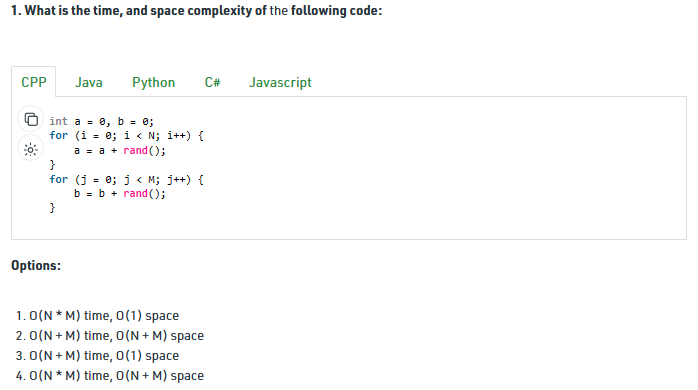

- Answer: 3. O(N + M) time, O(1) space
- Why: The first loop is O(N) and the second loop is O(M). Since N and M are independent variables, so we can’t say which one is the leading term. Therefore Time complexity of the given problem will be O(N+M).
Since variables size does not depend on the size of the input, therefore  Space Complexity will be constant or O(1)

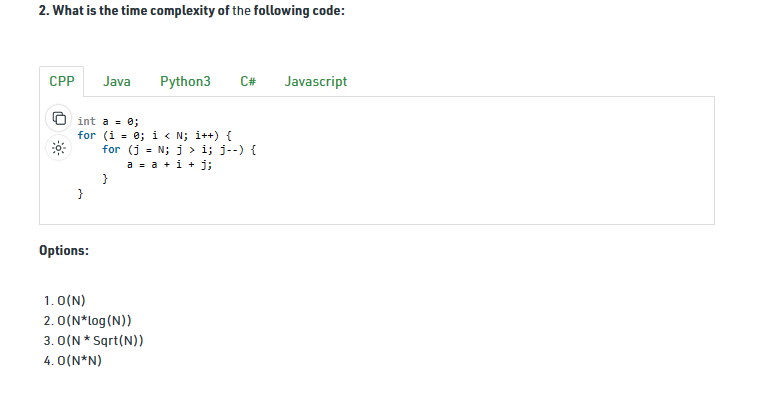

- Answer: 4. O(N*N)
- Why: 
    - The above code runs total no of times 
    - = N + (N – 1) + (N – 2) + … 1 + 0 
    - = N * (N + 1) / 2 
    - = 1/2 * N^2 + 1/2 * N 
    - O(N^2) times.

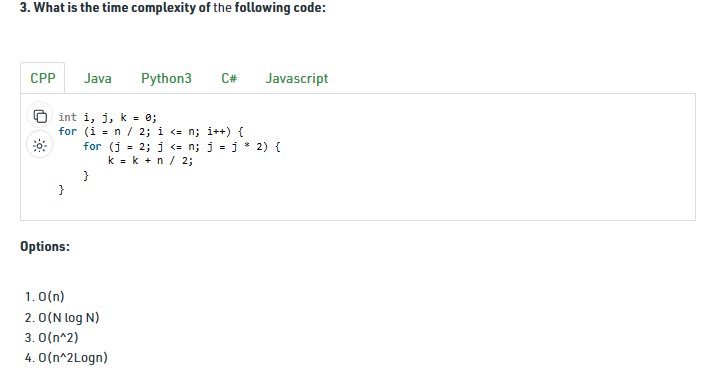

- Answer: 2. O(nLogn)
- Why: If you notice, j keeps doubling till it is less than or equal to n. Several times, we can double a number till it is less than n would be log(n). 
    - Let’s take the examples here. 
    - for n = 16, j = 2, 4, 8, 16 
    - for n = 32, j = 2, 4, 8, 16, 32 
    - So, j would run for O(log n) steps. 
    - i runs for n/2 steps. 
    - So, total steps = O(n/ 2 * log (n)) = O(n*logn)

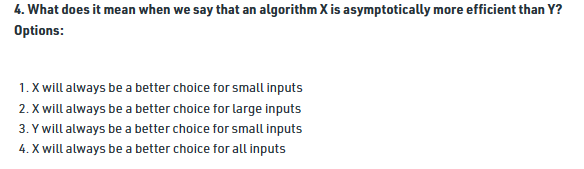

- Answer: 2. X will always be a better choice for large inputs
- Why: In asymptotic analysis, we consider the growth of the algorithm in terms of input size. An algorithm X is said to be asymptotically better than Y if X takes smaller time than y for all input sizes n larger than a value n0 where n0 > 0.

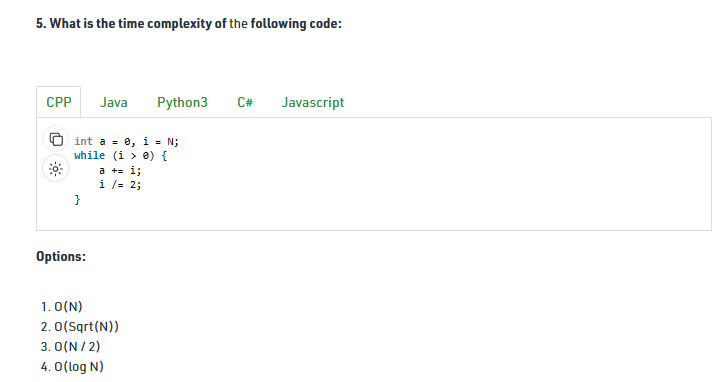

- Answer: 4. O(log N)
- Why: We have to find the smallest x such that ‘(N / 2^x )< 1 OR  2^x > N’ 
x = log(N)

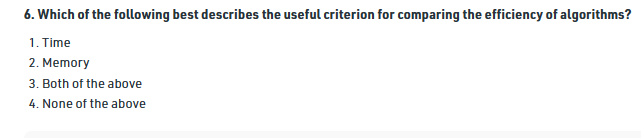

- Answer: 3. Both of the above
- Why: Comparing the efficiency of an algorithm depends on the time and memory taken by  an algorithm. The algorithm which runs in lesser time and takes less memory even for a large input size is considered a more efficient algorithm.

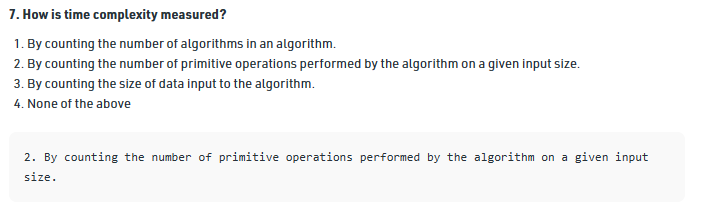

- Answer: 2. By counting the number of primitive operations performed by the algorithm on a given input size.


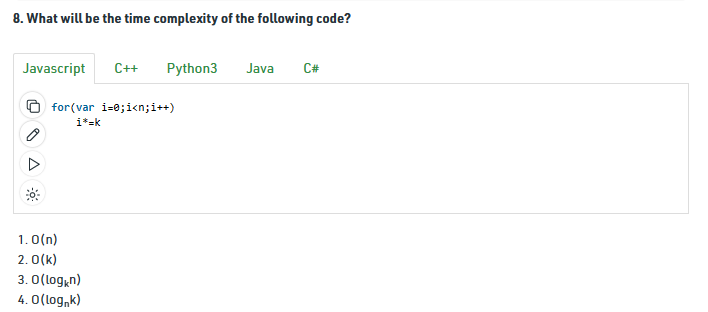

- Answer: 3. O(logkn)
- Why:  Because loops for the kn-1 times, so after taking log it becomes logkn.


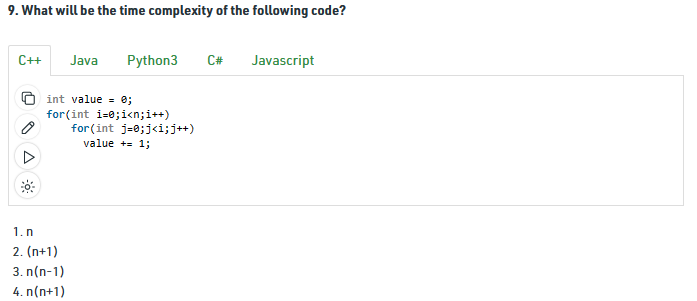

- Answer: 3. n(n-1)
- Why: First for loop will run for (n) times and another for loop will be run for (n-1) times as the inner loop will only run till the range i which is 1 less than n , so overall time will be n(n-1).

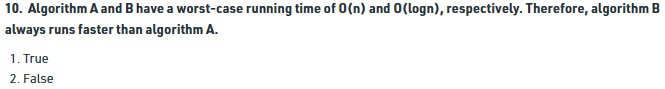

- Answer: False
- Why: The Big-O notation provides an asymptotic comparison in the running time of algorithms. For n < n0​​, algorithm A might run faster than algorithm B, for instance.



# Research on the different types of sorting algorithms and their time complexity.

1. Bubble sort: This is a simple sorting algorithm that repeatedly steps through the list, compares adjacent elements and swaps them if they are in the wrong order. The time complexity of bubble sort is O(n^2) in the worst case.

2. Selection sort: This algorithm sorts an array by repeatedly finding the minimum element from the unsorted part of the array and putting it at the beginning. The time complexity of selection sort is also O(n^2) in the worst case.

3. Insertion sort: This algorithm works by inserting each element into its proper place in a sorted sublist. The time complexity of insertion sort is O(n^2) in the worst case.

4. Merge sort: This is a divide-and-conquer algorithm that divides an array into two halves, sorts them independently, and then merges the sorted halves. The time complexity of merge sort is O(n log n) in the worst case.

5. Quick sort: This is also a divide-and-conquer algorithm that chooses a pivot element and partitions the array around the pivot, such that elements smaller than the pivot are placed before it, and elements larger than the pivot are placed after it. The time complexity of quick sort is O(n log n) in the worst case.

6. Heap sort: This algorithm uses a heap data structure to sort an array. It first builds a max-heap, then repeatedly extracts the maximum element from the heap and places it at the end of the array. The time complexity of heap sort is O(n log n) in the worst case.

# More Info

- Merge sort and quicksort are O(n log n) algorithms, which means their time complexity grows at a much slower rate than O(n^2) algorithms as the input size increases. These algorithms are widely used in practice because of their efficiency and adaptivity. Merge sort is a stable sorting algorithm, meaning that it preserves the relative order of equal elements in the input, while quicksort is not stable but is usually faster than merge sort.

- Heap sort is also an O(n log n) algorithm that uses a heap data structure to sort an array. It is an in-place algorithm, meaning that it requires only a constant amount of additional memory besides the input array. Heap sort is not adaptive, meaning that its time complexity does not depend on the initial order of the input, but it is still efficient for large inputs.

- Bubble sort, selection sort, and insertion sort are all O(n^2) algorithms, which means their time complexity grows as a quadratic function of the input size. These algorithms are simple to understand and implement, but they are not efficient for large inputs.

- The time complexity of an algorithm refers to the number of steps it takes to complete as a function of the input size. The worst-case time complexity indicates the maximum number of steps an algorithm would take for any input of size n. The average-case time complexity indicates the expected number of steps an algorithm would take for a randomly generated input of size n.

# Why is time and space complexity important when choosing an algorithm?

## Answer:
Time and space complexity are important when choosing an algorithm because they directly impact the performance of the algorithm on different input sizes and resources. The time complexity of an algorithm determines the amount of time required to execute the algorithm. If an algorithm has a high time complexity, it may take a very long time to execute on large input sizes, which could be unacceptable in many applications. For example, in a web application, a slow algorithm might make users wait too long for the page to load, which could lead to a poor user experience and lost business. Choosing an algorithm with an appropriate time and space complexity is crucial for achieving optimal performance and efficient use of resources in various applications, such as web development, data analysis, and machine learning. For instance, in data analysis, if a large dataset needs to be sorted, it is crucial to choose an algorithm with a lower time complexity and a lower space complexity to optimize the performance and memory usage.

# Should you always use a constant time algorithm / Should you never use an exponential time algorithm? Explain? 

## Answer: 
In general, it is desirable to use algorithms with a lower time complexity because they can execute faster on larger input sizes. Constant time algorithms, which have a time complexity that does not depend on the input size, are often preferred for simple operations that need to be performed frequently, such as accessing a value in an array or checking if a data structure is empty. Constant time algorithms are typically very fast, which makes them a good choice for many situations. However, it is not always possible to use constant time algorithms for all tasks. Some tasks, such as sorting or searching large datasets, require more complex algorithms with a higher time complexity. In these cases, algorithms with polynomial time complexity, such as O(n log n) or O(n^2), may be acceptable if they provide adequate performance on the given input sizes. In summary, while constant time algorithms are generally desirable, it is not always possible or practical to use them for all tasks. Algorithms with a higher time complexity may be acceptable for certain tasks, but algorithms with exponential time complexity should generally be avoided. It is important to choose the most appropriate algorithm for a given task, taking into account the tradeoffs between time complexity and other factors such as space complexity and accuracy.

# What are some general patterns that you noticed to determine each algorithm's time and space complexity?


## Answer:

1. Iterative loops: The time complexity of an algorithm with iterative loops is usually proportional to the number of iterations. The space complexity of such an algorithm is usually proportional to the amount of memory required to store the variables used in the loop.

2. Recursive functions: The time complexity of a recursive function is often expressed as a function of the number of recursive calls made. Recursive functions can be inefficient if they make too many recursive calls, leading to a high time complexity. The space complexity of a recursive function is often proportional to the maximum depth of the recursion tree, which is the maximum number of recursive calls that can be made before reaching the base case.

3. Data structures: The time and space complexity of an algorithm can depend on the type of data structure used. For example, the time complexity of a search or insertion operation on an array is O(n), whereas the time complexity of the same operation on a binary search tree is O(log n). Similarly, the space complexity of an algorithm can be affected by the amount of memory required to store the data structure.

4. Divide-and-conquer algorithms: Divide-and-conquer algorithms often have a time complexity that can be expressed as a recurrence relation. For example, merge sort and quicksort have a time complexity of O(n log n) because they recursively divide the input into smaller subproblems, each of which requires O(log n) time to solve. The space complexity of a divide-and-conquer algorithm can depend on the depth of the recursion tree, as well as the amount of memory required to merge or combine the subproblems.

5. Dynamic programming algorithms: Dynamic programming algorithms often use a table or array to store intermediate results, which can result in a higher space complexity. However, the time complexity of a dynamic programming algorithm is often much lower than a brute-force algorithm, as it avoids redundant computations by reusing intermediate results.

# Quiz

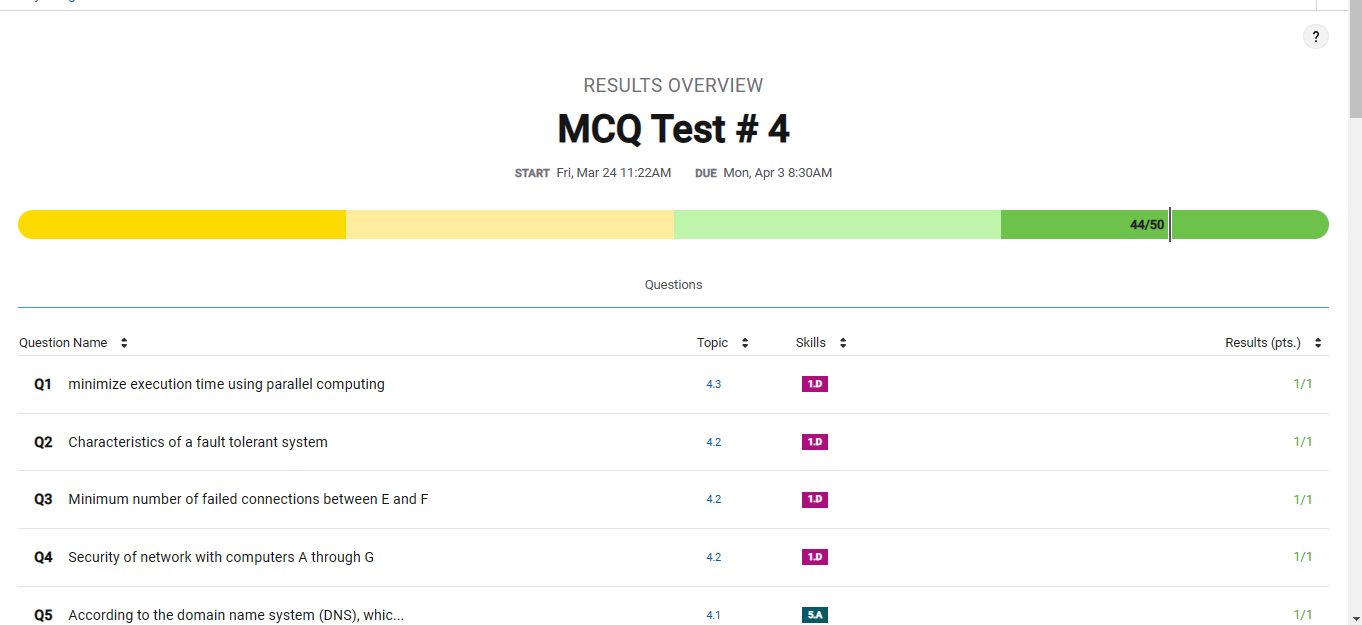

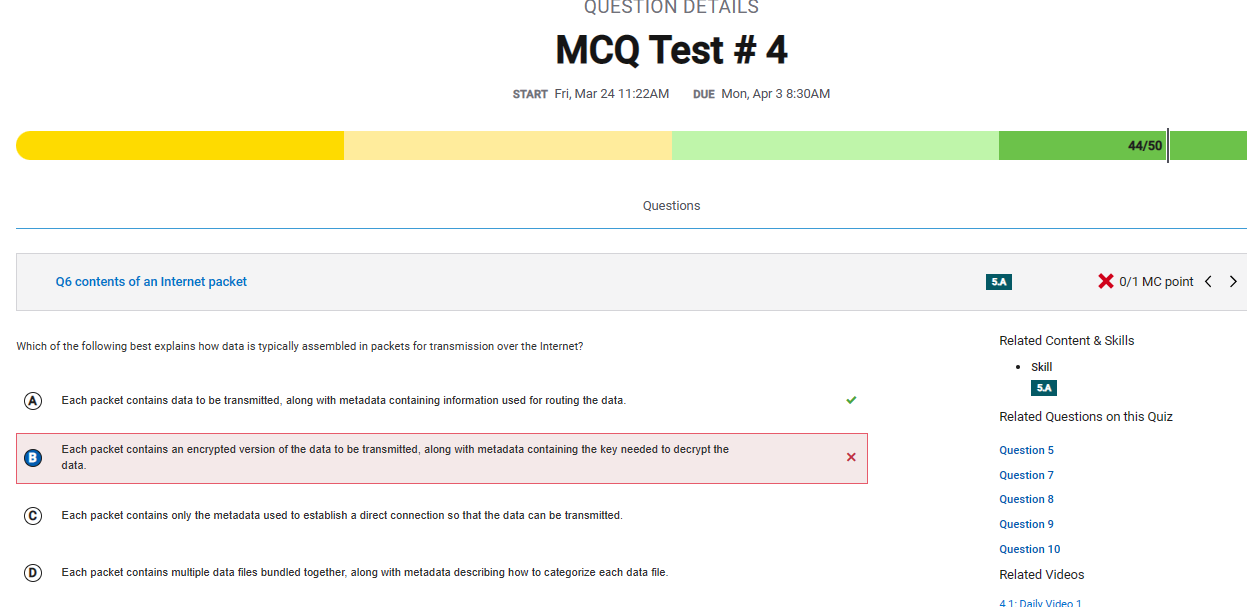

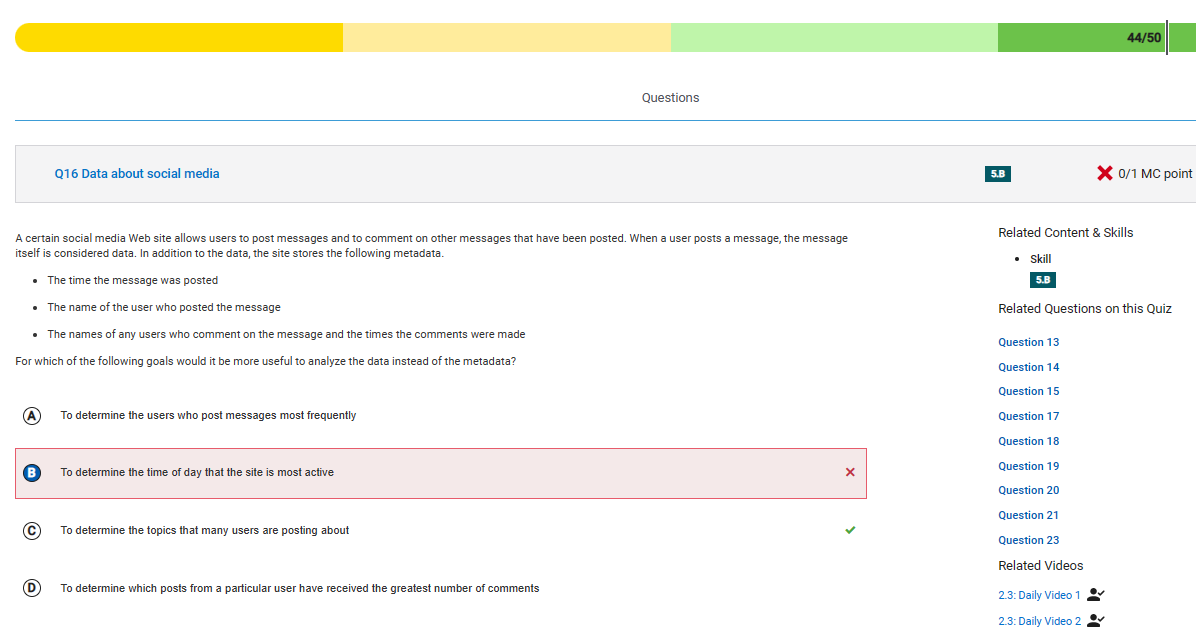

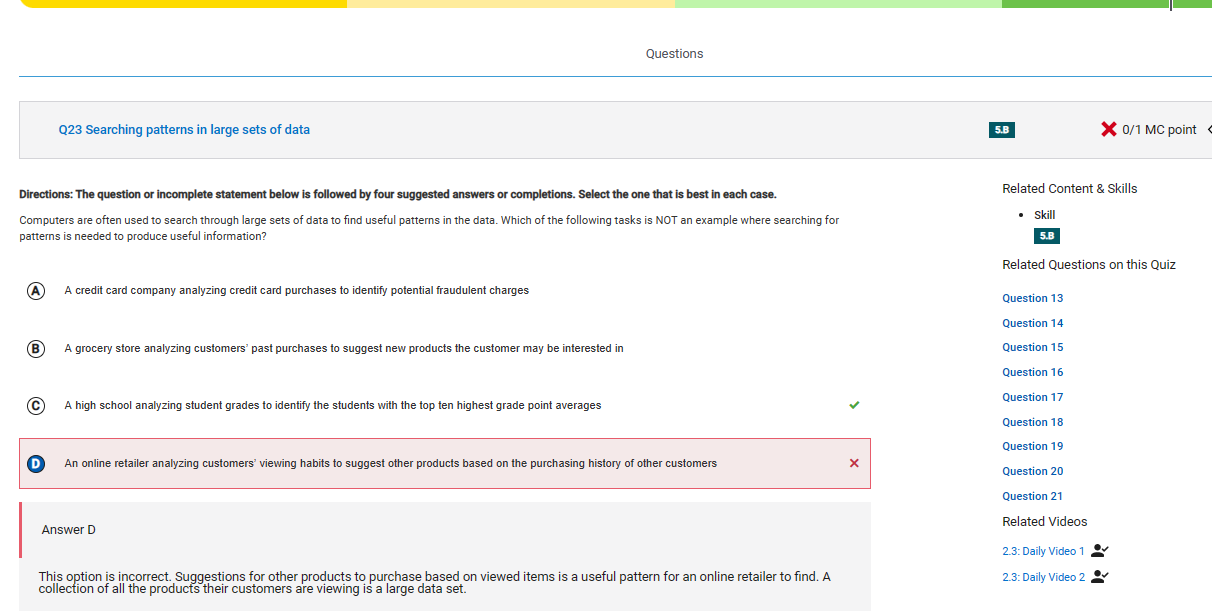

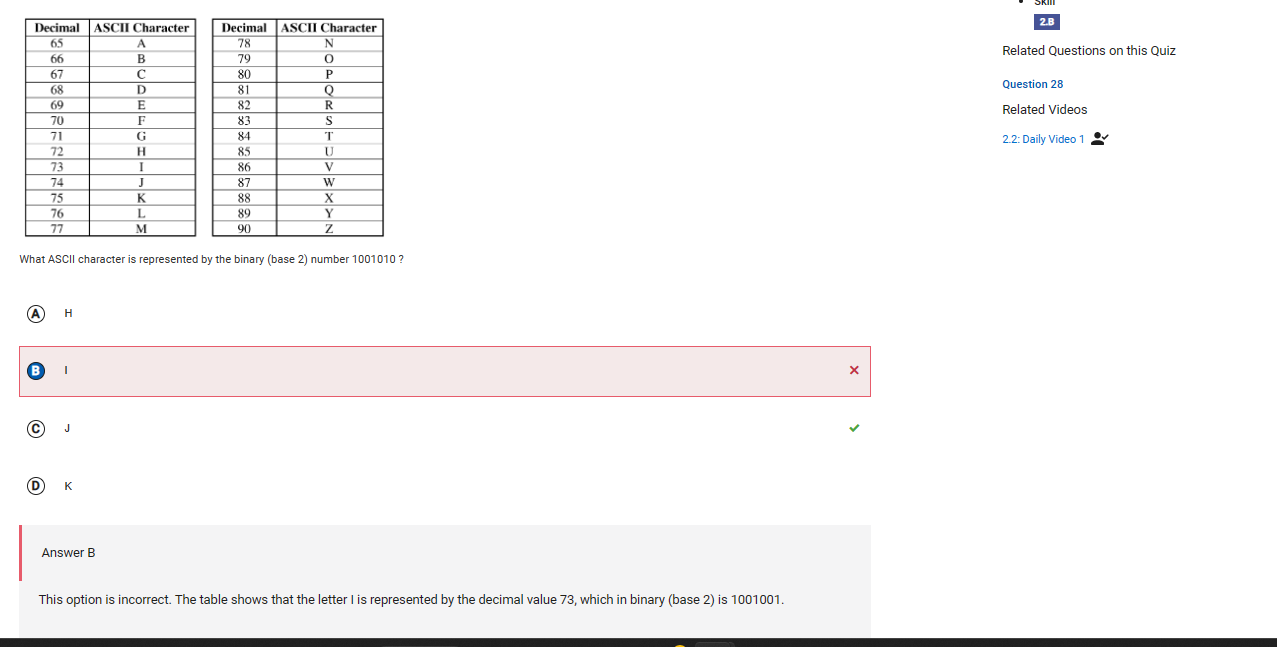

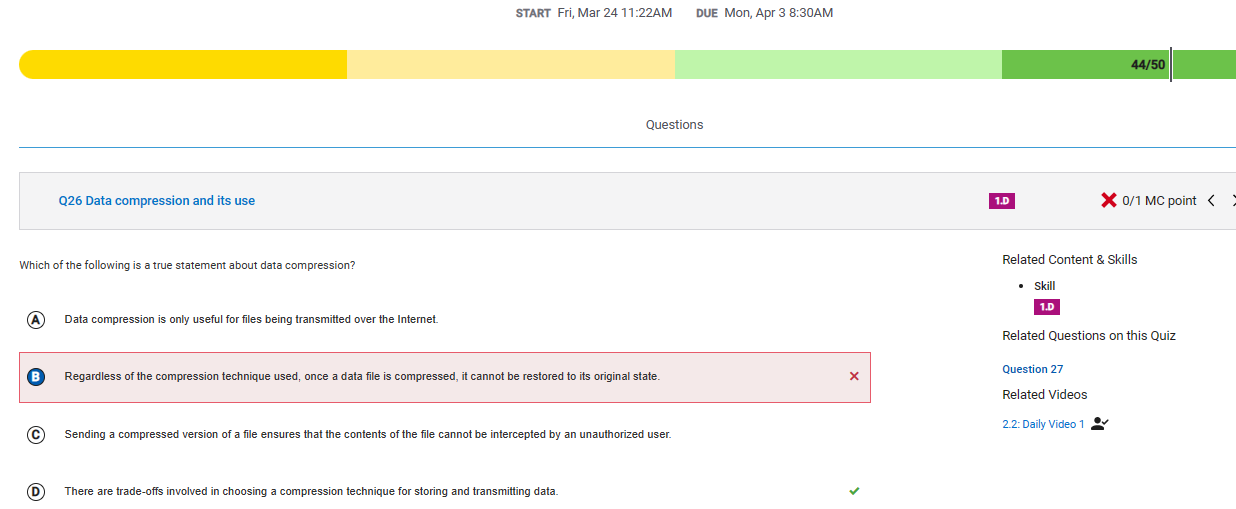

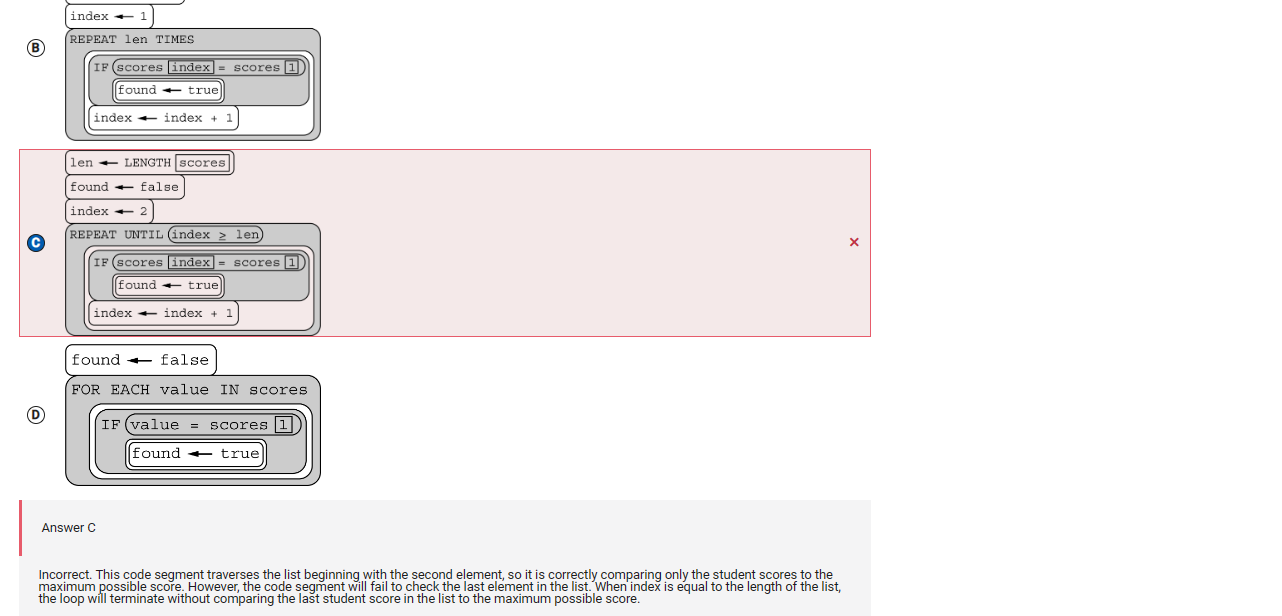